In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#path to the 'DataGenerator.py' and the 'DenseNet3D.py' files
%cd /content/drive/My Drive/gitRendu

#PATH variables (don't forget the last '/')
framesPATH = '/content/drive/My Drive/gitRendu/data/frames/' #where are stored the Frames
masksPATH = '/content/drive/My Drive/gitRendu/data/masks/' #where are stored the masks
weightsPATH = '/content/drive/My Drive/gitRendu/data/weights/' #where will be saved the model

#training variables
timeToVisualize = 32 #what frame are you willing to visualize
onlyAIANodule = True #do you want to see all cells in the mask or just the 'AIACentralNodul' and 'AIATerminalNodul' ?
nbrClasses = 4 #total number of classes in the masks (counting '0' as a class)
modelName = 'exampleModel' #the name of the model that will be loaded

/content/drive/My Drive/gitRendu


In [0]:
!pip install nd2reader
!pip install h5py
!pip install git+https://www.github.com/keras-team/keras-contrib.git

     |████████████████████████████████| 81kB 11.0MB/s 
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-52mg3vd9
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-52mg3vd9
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101065 sha256=fdca1ce773201f57c296401b1261d462571a16e0cf6cc2e2636fdb14b324361f
  Stored in directory: /tmp/pip-ephem-wheel-cache-2986dh4b/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [0]:
import numpy as np
import time
import glob, os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot as plt
import keras
import tensorflow
import skimage
import sys
from skimage.transform import resize
from scipy.ndimage import zoom
import cv2
from sklearn.utils import class_weight
from keras.models import Sequential
from DataGenerator import DataGenerator
import DenseNet3D

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)4112384/45929032 bytes (9.0%)7921664/45929032 bytes (17.2%)11943936/45929032 bytes (26.0%)16007168/45929032 bytes (34.9%)20029440/45929032 bytes (43.6%)24109056/45929032 bytes (52.5%)28180480/45929032 bytes (61.4%)32358400/45929032 bytes (70.5%)36519936/45929032 bytes (79.5%)39288832/45929032 bytes (85.5%)43417600/45929032 bytes (94.5%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

Using TensorFlow backend.


In [0]:
n_class = nbrClasses
#define the model
model = DenseNet3D.DenseNet3D_FCN(input_shape=(80, 128, 32, 1),nb_dense_block=4, growth_rate=16,\
                       nb_layers_per_block=3, upsampling_type='upsampling', classes=n_class, activation='softmax')
#load the model
model.load_weights(weightsPATH + modelName)

In [0]:
ID = timeToVisualize
#load the frame
x = np.load(framesPATH + 'frame_'+str(ID)+'.npy')
print(np.shape(x))
#load the mask
y = np.load(masksPATH + 'mask_'+str(ID)+'.npy')
#reshape input and predict the corresponding mask
x_pred = x.reshape((1,80, 128, 32,1))
y_pred = model.predict(x_pred)

(80, 128, 32)


In [0]:
print(np.shape(x))
print(np.shape(y))
print(np.shape(y_pred))


(80, 128, 32)
(80, 128, 32)
(1, 80, 128, 32, 4)


In [0]:
y_pred = np.around(y_pred).reshape((80, 128, 32,n_class))
y_pred_to_plot = np.zeros(np.shape(y_pred)[:3]) 
for i in range(len(y_pred[:])):
  for j in range(len(y_pred[i])):
    for k in range(len(y_pred[i,j,:,:])):
      for c in range(len(y_pred[i,j,k,:])):
       if y_pred[i, j, k, c] > 0:
         y_pred_to_plot[i, j, k] = c
y_pred_comp = resize(y_pred_to_plot, (352, 512, 35),mode='edge',anti_aliasing=False,anti_aliasing_sigma=None, order=0)

In [0]:
print(np.unique(y_pred_to_plot))
print(np.unique(y))
x = resize(x, (352, 512, 35),mode='edge',anti_aliasing=False,anti_aliasing_sigma=None, order=0)

#remove unwanted cell parts (non central/terminal AIA noduls are labeled as 3)
if(onlyAIANodule):
  y_pred_comp[np.where(y_pred_comp == 3)] = 0
  y[np.where(y == 3)] = 0

[0. 1. 2. 3.]
[0. 1. 2. 3.]


SLICE Z = 0 FOR TIME 32
Frame :


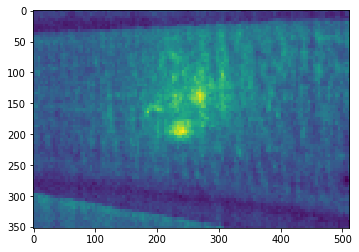

true mask :


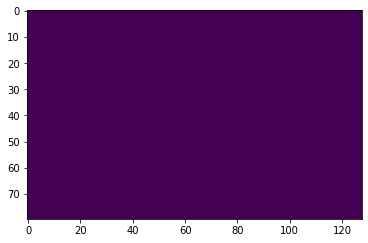

Predicted mask :


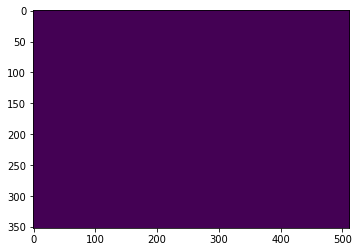

----------------------------------
SLICE Z = 1 FOR TIME 32
Frame :


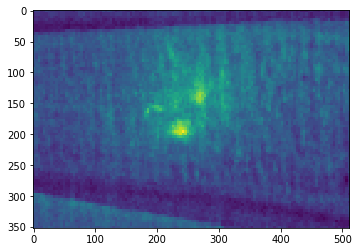

true mask :


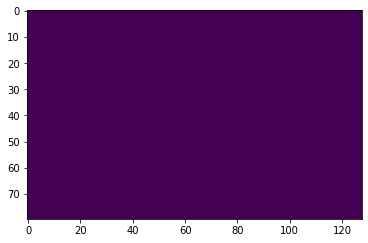

Predicted mask :


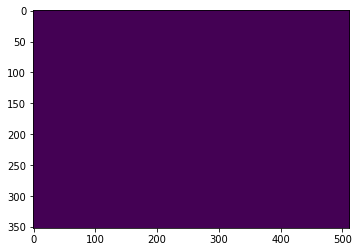

----------------------------------
SLICE Z = 2 FOR TIME 32
Frame :


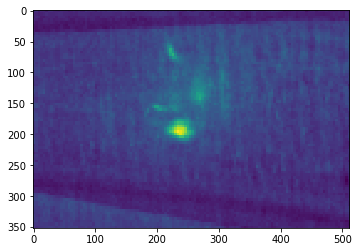

true mask :


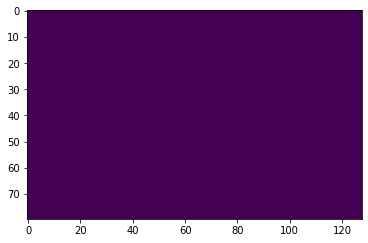

Predicted mask :


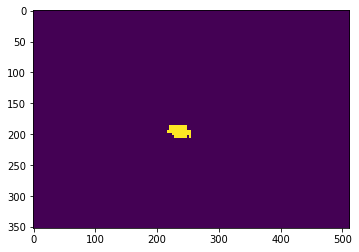

----------------------------------
SLICE Z = 3 FOR TIME 32
Frame :


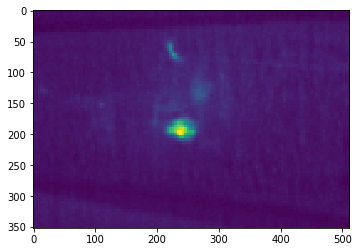

true mask :


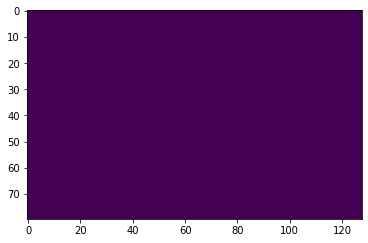

Predicted mask :


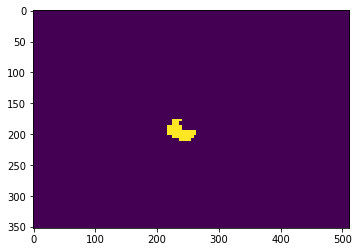

----------------------------------
SLICE Z = 4 FOR TIME 32
Frame :


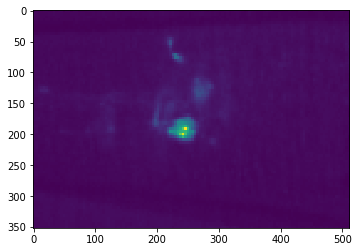

true mask :


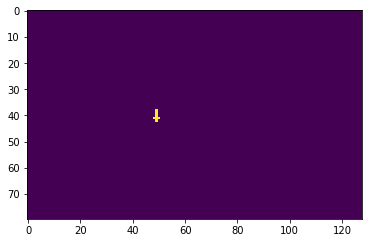

Predicted mask :


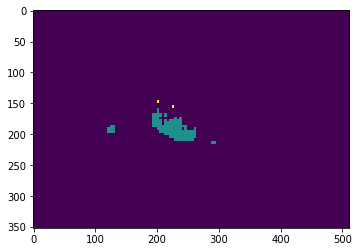

----------------------------------
SLICE Z = 5 FOR TIME 32
Frame :


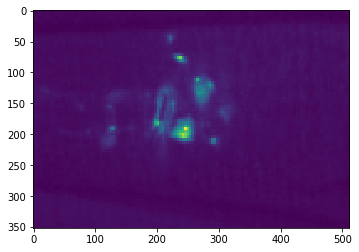

true mask :


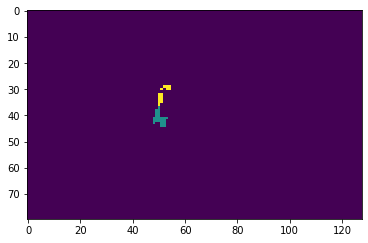

Predicted mask :


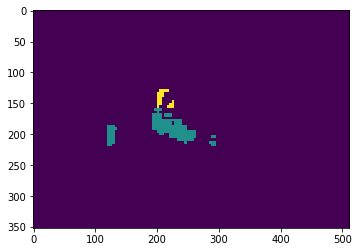

----------------------------------
SLICE Z = 6 FOR TIME 32
Frame :


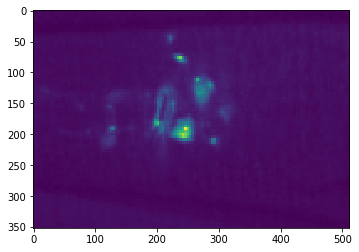

true mask :


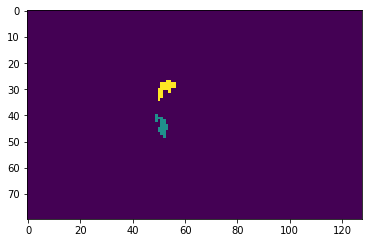

Predicted mask :


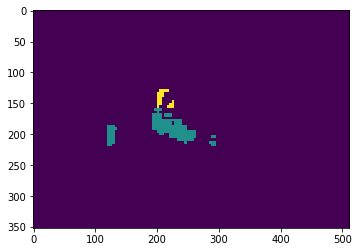

----------------------------------
SLICE Z = 7 FOR TIME 32
Frame :


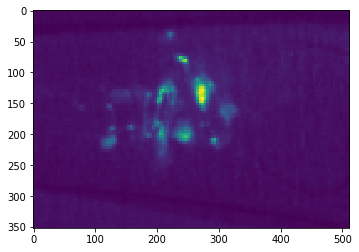

true mask :


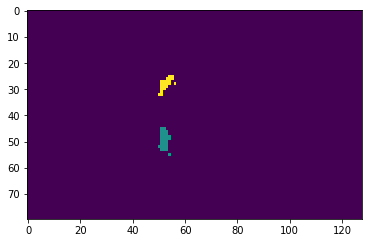

Predicted mask :


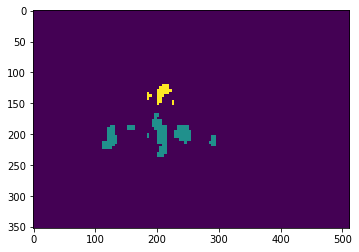

----------------------------------
SLICE Z = 8 FOR TIME 32
Frame :


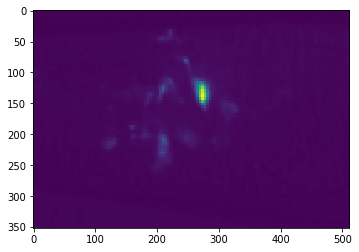

true mask :


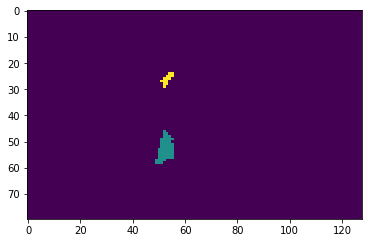

Predicted mask :


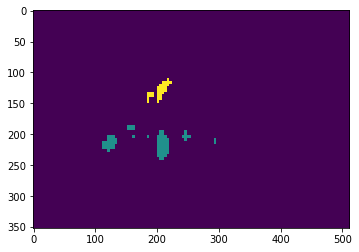

----------------------------------
SLICE Z = 9 FOR TIME 32
Frame :


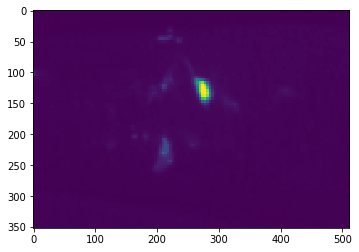

true mask :


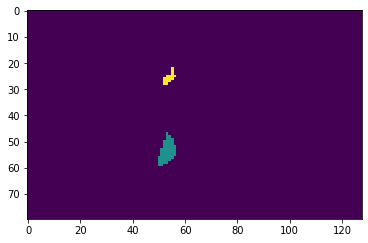

Predicted mask :


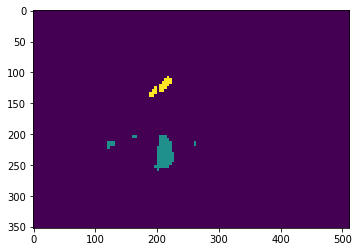

----------------------------------
SLICE Z = 10 FOR TIME 32
Frame :


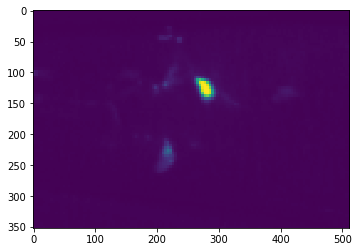

true mask :


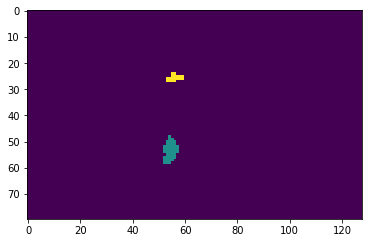

Predicted mask :


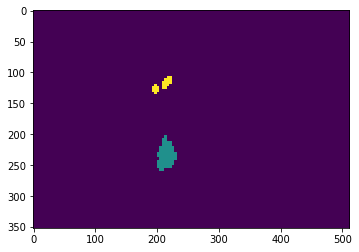

----------------------------------
SLICE Z = 11 FOR TIME 32
Frame :


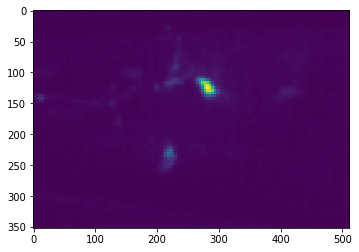

true mask :


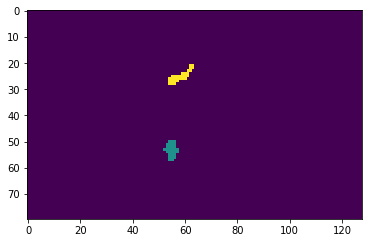

Predicted mask :


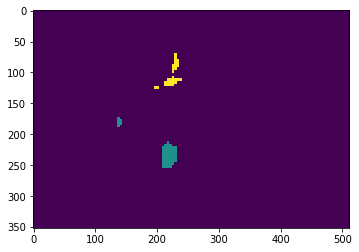

----------------------------------
SLICE Z = 12 FOR TIME 32
Frame :


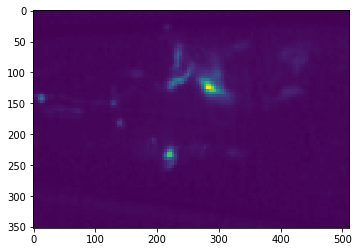

true mask :


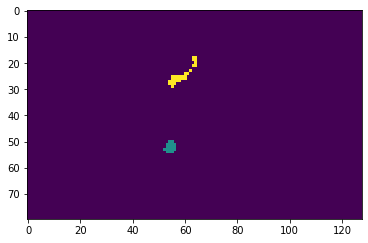

Predicted mask :


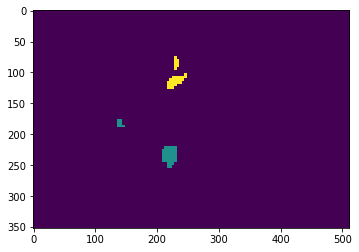

----------------------------------
SLICE Z = 13 FOR TIME 32
Frame :


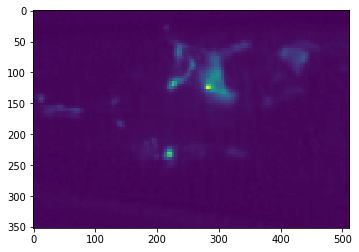

true mask :


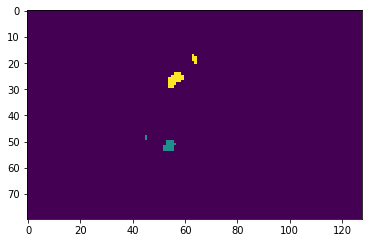

Predicted mask :


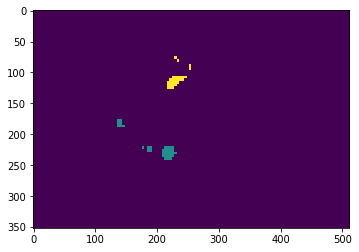

----------------------------------
SLICE Z = 14 FOR TIME 32
Frame :


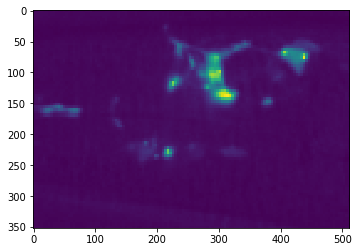

true mask :


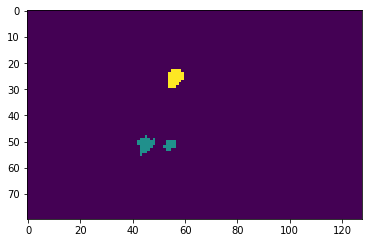

Predicted mask :


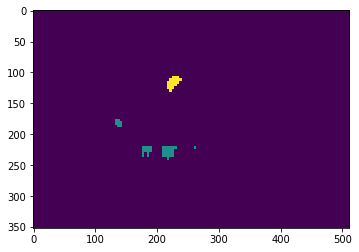

----------------------------------
SLICE Z = 15 FOR TIME 32
Frame :


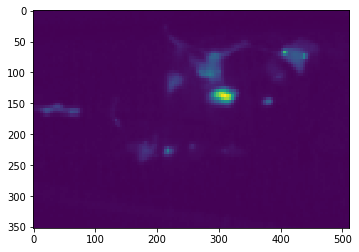

true mask :


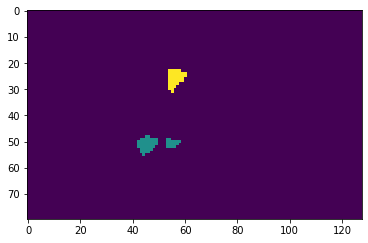

Predicted mask :


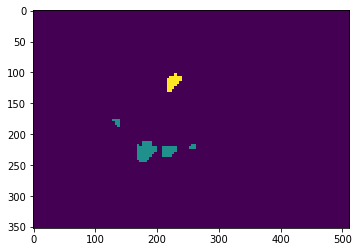

----------------------------------
SLICE Z = 16 FOR TIME 32
Frame :


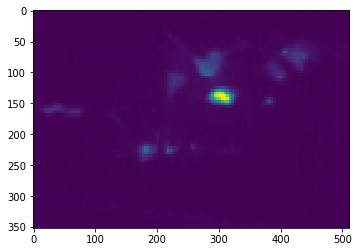

true mask :


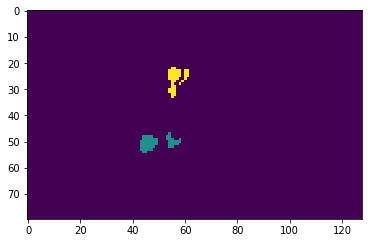

Predicted mask :


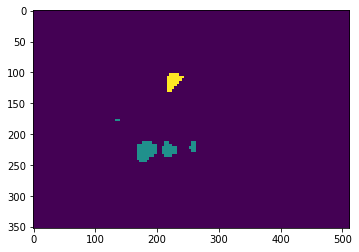

----------------------------------
SLICE Z = 17 FOR TIME 32
Frame :


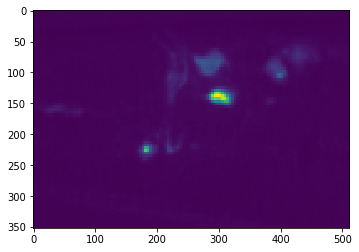

true mask :


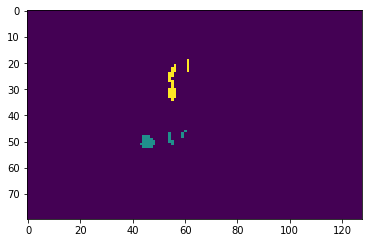

Predicted mask :


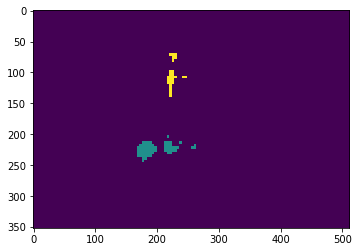

----------------------------------
SLICE Z = 18 FOR TIME 32
Frame :


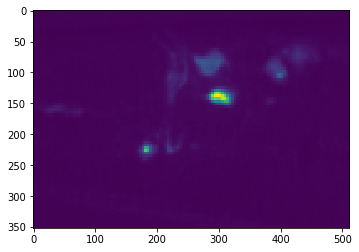

true mask :


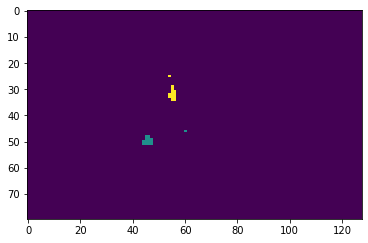

Predicted mask :


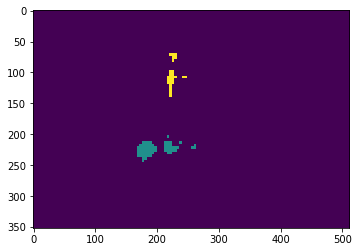

----------------------------------
SLICE Z = 19 FOR TIME 32
Frame :


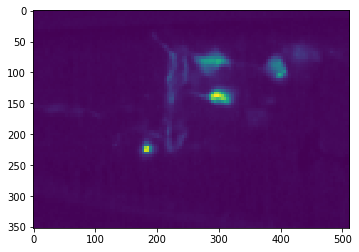

true mask :


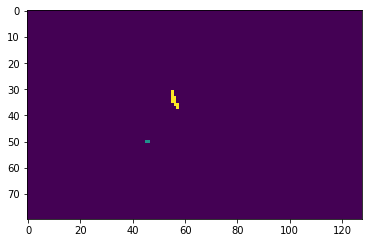

Predicted mask :


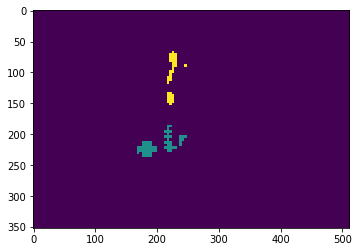

----------------------------------
SLICE Z = 20 FOR TIME 32
Frame :


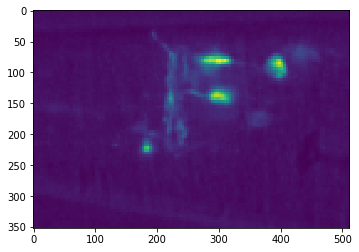

true mask :


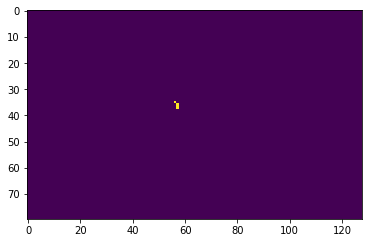

Predicted mask :


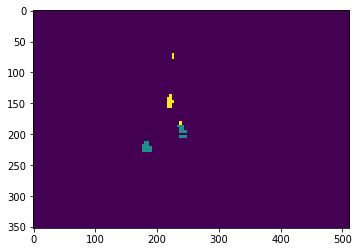

----------------------------------
SLICE Z = 21 FOR TIME 32
Frame :


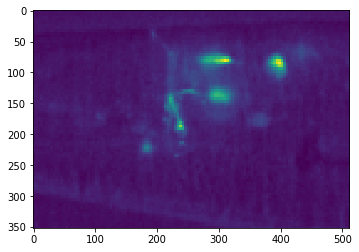

true mask :


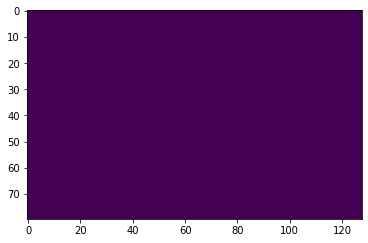

Predicted mask :


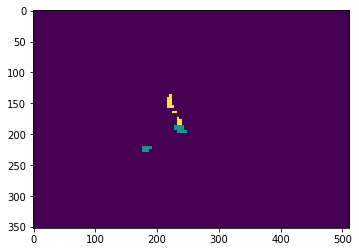

----------------------------------
SLICE Z = 22 FOR TIME 32
Frame :


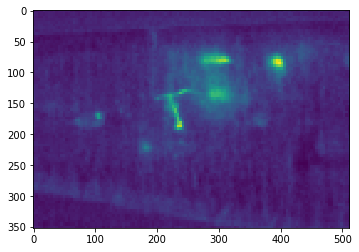

true mask :


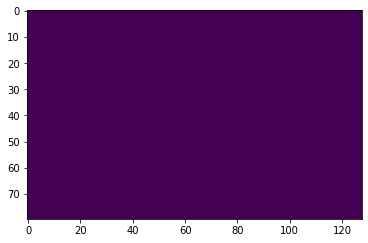

Predicted mask :


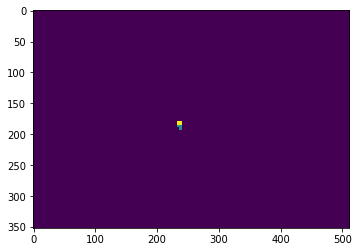

----------------------------------
SLICE Z = 23 FOR TIME 32
Frame :


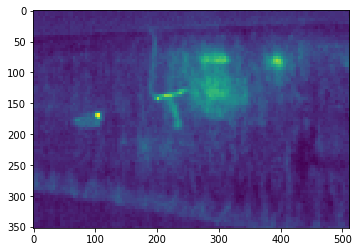

true mask :


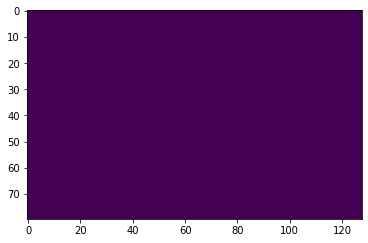

Predicted mask :


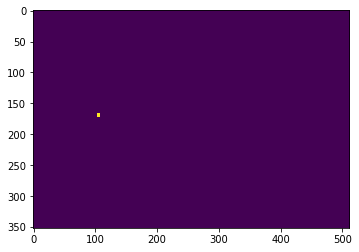

----------------------------------
SLICE Z = 24 FOR TIME 32
Frame :


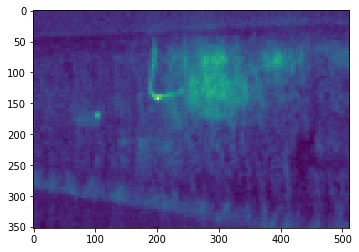

true mask :


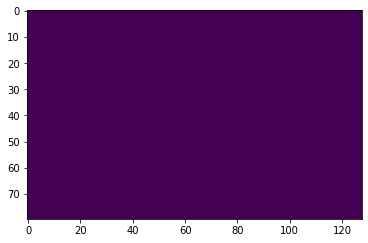

Predicted mask :


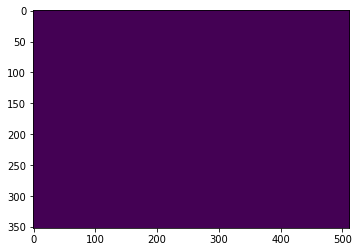

----------------------------------
SLICE Z = 25 FOR TIME 32
Frame :


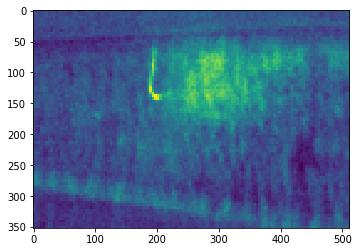

true mask :


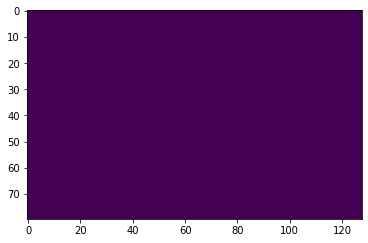

Predicted mask :


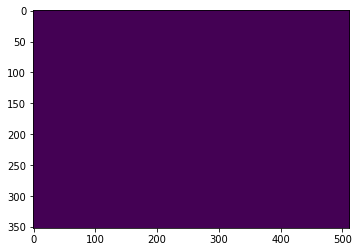

----------------------------------
SLICE Z = 26 FOR TIME 32
Frame :


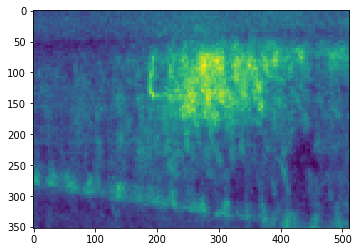

true mask :


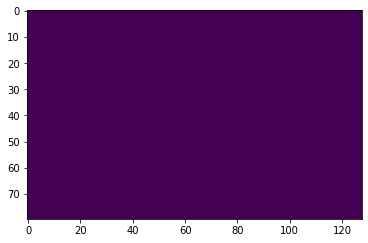

Predicted mask :


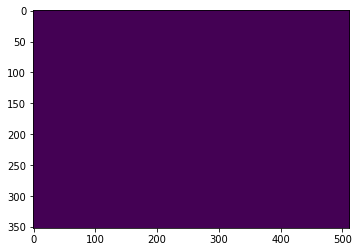

----------------------------------
SLICE Z = 27 FOR TIME 32
Frame :


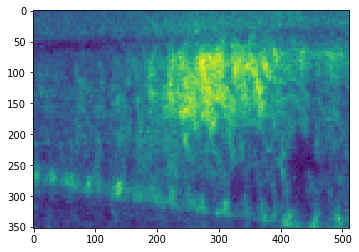

true mask :


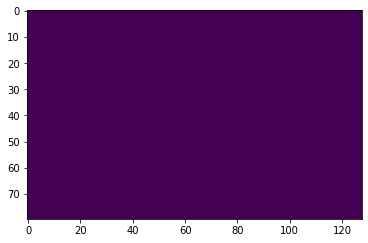

Predicted mask :


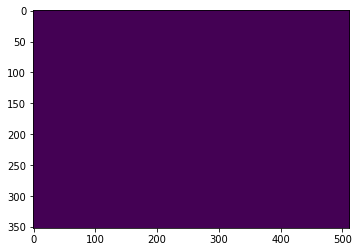

----------------------------------
SLICE Z = 28 FOR TIME 32
Frame :


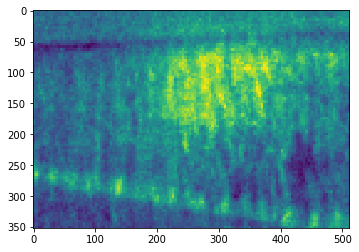

true mask :


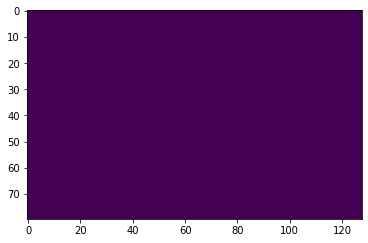

Predicted mask :


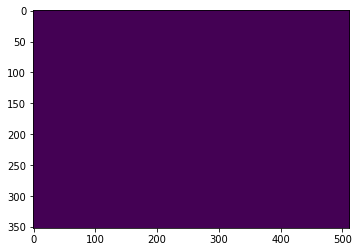

----------------------------------
SLICE Z = 29 FOR TIME 32
Frame :


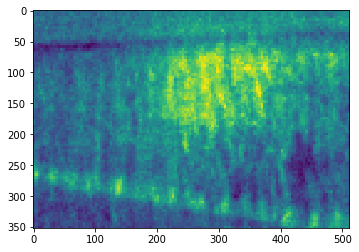

true mask :


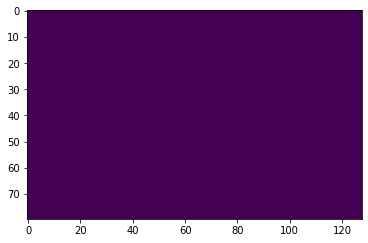

Predicted mask :


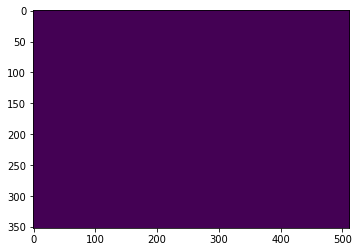

----------------------------------
SLICE Z = 30 FOR TIME 32
Frame :


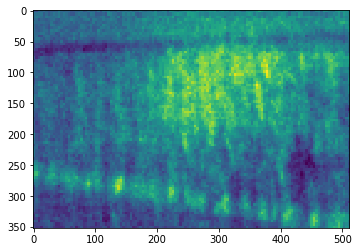

true mask :


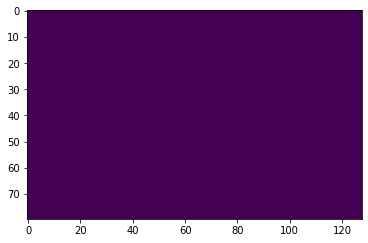

Predicted mask :


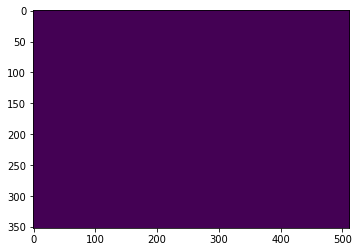

----------------------------------
SLICE Z = 31 FOR TIME 32
Frame :


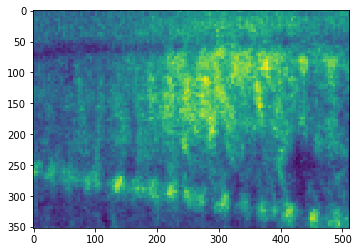

true mask :


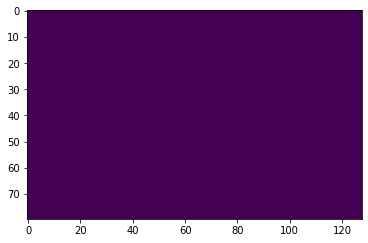

Predicted mask :


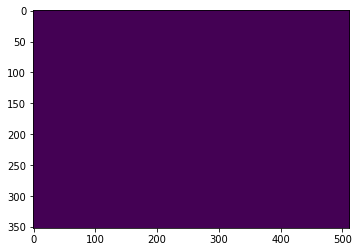

----------------------------------


In [0]:
for layer in range(0,32):
  print("SLICE Z = "+str(layer)+" FOR TIME " + str(timeToVisualize))
  print("Frame :")
  plt.imshow(x[:,:,layer], interpolation='nearest')
  plt.show()
  print("true mask :")
  plt.imshow(y[:,:,layer], interpolation='nearest')
  plt.show()
  print("Predicted mask :")
  plt.imshow(y_pred_comp[:,:,layer], interpolation='nearest')
  plt.show()
  print("----------------------------------")

***These results are after a single epoch of training. It is here more to show that it works rather than as final results.***